# TECH2 Mandatory assignment 2

## About the mandatory assignment

-   The assignment must be completed individually.
-   You are allowed to use all online resources for help, including generative AI. You must include a statement on how you used AI to solve the tasks.
-   After the assignment deadline, you must perform a peer review of two other students' assignment on Canvas. You're not allowed to use AI to write the peer-review for you.
-   Deadline for the assignment: Friday, October 17, 16:00.
-   Deadline for the peer review: Friday, October 24, 16:00.


## Requirements

-   Your solution needs to be uploaded to GitHub. You should fork the assignment repository at
    [https://github.com/richardfoltyn/TECH2-H25-assignment2](https://github.com/richardfoltyn/TECH2-H25-assignment2)
    and add your solution to this notebook.
-   All commits in your repository must be *prior* to the deadline. 
-   You need to make sure that your GitHub repository is publicly accessible. This can be changed in the GitHub repository setttings, if required.
-   You need to submit the URL to the your GitHub repository on Canvas.
-   Make sure your notebook runs without errors (`Restart` and `Run all`). 
-   Your notebook *must* run with the TECH2 environment we've been using in part 2. You can create this environment from the 
    `environment.yml` file in this repository if you haven't done so earlier.


## Tasks

In this assignment, you are asked to analyze a 10% sub-sample of the Survey of Consumer Finances (SCF), a survey of household portfolios that is representative of the US population. The survey was administered every 3 years from 1989 to 2022. The appendix in this document contains a description of the variables present in this data set (this is a subset; the original SCF contains many more variables).

1.  Data preprocessing

    1.  Read the CSV file `SCF_10pct.csv` stored in this repository.
    2.  Keep only observations where the household head is aged between 25 and 89. 
    3.  Create the column `'college'`, which contains an indicator variable that is 1 when the household head has at least some college (column `'educ'` is 3 or 4), and 0 otherwise.
    4.  Divide the values in the column `'networth'` by 1,000 so that they are reported in thousands of US dollars.
    5.  Report the number of observations in the final sample.

2.  In this part, you're asked to analyze how net worth (total gross assets minus total debt) varies across the four education levels (no high school, high school, some college, 4-year college or more):

    1.  Compute the average net worth (in thousands of US dollars) by education (use a loop).
    2.  Create a bar chart that plots the average net worth by education.

3.  In this part, you're asked to analyze how net worth has changed over the last 3 decades:

    1.  Compute the average net worth (in thousands of US dollars) by survey year (use a loop).
    2.  Create a line plot that shows the evolution of average net worth over the years 1989 to 2022.

4.  Finally, combine the analyses from the previous parts to see how net worth evolved over the years for those with and without college.

    1.  Compute the average net worth (in thousands of US dollars) by survey year, separately for non-college (`college=0`) and the college-educated (`college=1`).
    2.  Create a line plot that shows the evolution of net worth over the years 1989 to 2022 by college status, i.e., your figure should contain two lines, one for college and one for non-college.

Remember to add axis labels, titles, and legends (where applicable) to all your figures.


## Hints

-   The assignment can be solved using the concepts we covered up to and including lecture/workshop 3 on Friday, October 10. 
-   In particular, you don't need `groupby()` which we'll cover later in the course, but you can instead loop over education levels or years, as needed.

***
**WRITE YOUR SOLUTION TO PARTS 1-4 HERE**

## Part 1
#### __1.1__

In [1]:
# import pandas
import pandas as pd

# read csv file
df1 = pd.read_csv('SCF_10pct.csv')
df1

,id,year,age,educ,networth
0,1,1989,35,2,0.0
1,2,1989,35,2,0.0
2,3,1989,51,2,16899.9
3,4,1989,33,2,25845.6
4,5,1989,33,2,25845.6
...,...,...,...,...,...
5803,5804,2022,57,2,129101.0
5804,5805,2022,80,4,747400.0
5805,5806,2022,67,4,7354760.0
5806,5807,2022,70,4,3229000.0


#### __1.2__

In [2]:
# only include observation with age between 25 and 89 in dataframe
df1 = df1.query('25 <= age <= 89')
df1

,id,year,age,educ,networth
0,1,1989,35,2,0.0
1,2,1989,35,2,0.0
2,3,1989,51,2,16899.9
3,4,1989,33,2,25845.6
4,5,1989,33,2,25845.6
...,...,...,...,...,...
5803,5804,2022,57,2,129101.0
5804,5805,2022,80,4,747400.0
5805,5806,2022,67,4,7354760.0
5806,5807,2022,70,4,3229000.0


#### __1.3__

In [3]:
# create a new column where education level 3 or 4 is True, and False otherwise
# use astype(int) to make the boolean values into integers
df1['college'] = df1['educ'].isin([3, 4]).astype(int)
df1

C:\Users\Helena\AppData\Local\Temp\ipykernel_1800\1708176974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['college'] = df1['educ'].isin([3, 4]).astype(int)


,id,year,age,educ,networth,college
0,1,1989,35,2,0.0,0
1,2,1989,35,2,0.0,0
2,3,1989,51,2,16899.9,0
3,4,1989,33,2,25845.6,0
4,5,1989,33,2,25845.6,0
...,...,...,...,...,...,...
5803,5804,2022,57,2,129101.0,0
5804,5805,2022,80,4,747400.0,1
5805,5806,2022,67,4,7354760.0,1
5806,5807,2022,70,4,3229000.0,1


#### __1.4__

In [4]:
df1['networth'] = df1['networth']/1000
df1

C:\Users\Helena\AppData\Local\Temp\ipykernel_1800\2196373008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['networth'] = df1['networth']/1000


,id,year,age,educ,networth,college
0,1,1989,35,2,0.0000,0
1,2,1989,35,2,0.0000,0
2,3,1989,51,2,16.8999,0
3,4,1989,33,2,25.8456,0
4,5,1989,33,2,25.8456,0
...,...,...,...,...,...,...
5803,5804,2022,57,2,129.1010,0
5804,5805,2022,80,4,747.4000,1
5805,5806,2022,67,4,7354.7600,1
5806,5807,2022,70,4,3229.0000,1


#### __1.5__

The number of observations in the final sample is 5471.

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5471 entries, 0 to 5807
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        5471 non-null   int64  
 1   year      5471 non-null   int64  
 2   age       5471 non-null   int64  
 3   educ      5471 non-null   int64  
 4   networth  5471 non-null   float64
 5   college   5471 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 299.2 KB


## Part 2

#### __2.1__

In [46]:
df1_educ1 = df1.query('educ == 1')
avg1 = df1_educ1['networth'].sum() / len(df1_educ1)
print(f'The average networth for education level 1 (no high school) is {avg1:.2f} thousand U.S. dollars.')

df1_educ2 = df1.query('educ == 2')
avg2 = df1_educ2['networth'].sum() / len(df1_educ2)
print(f'The average networth for education level 2 (high school) is {avg2:.2f} thousand U.S. dollars.')

df1_educ3 = df1.query('educ == 3')
avg3 = df1_educ3['networth'].sum() / len(df1_educ3)
print(f'The average networth for education level 3 (some college) is {avg3:.2f} thousand U.S. dollars.')

df1_educ4 = df1.query('educ == 4')
avg4 = df1_educ4['networth'].sum() / len(df1_educ4)
print(f'The average networth for education level 4 (4-year college or more) is {avg4:.2f} thousand U.S. dollars.')


The average networth for education level 1 (no high school) is 154.41 thousand U.S. dollars.
The average networth for education level 2 (high school) is 279.35 thousand U.S. dollars.
The average networth for education level 3 (some college) is 1107.28 thousand U.S. dollars.
The average networth for education level 4 (4-year college or more) is 1677.32 thousand U.S. dollars.


In [87]:
# Create empty variables to store the networth sum of each education level
sum1 = 0
sum2 = 0
sum3 = 0
sum4 = 0

for i in range(len(df1)):
    if df1['educ'].iloc[i] == 1:
        sum1 = sum1 + df1['networth'].iloc[i]

    elif df1['educ'].iloc[i] == 2:
        sum2 = sum2 + df1['networth'].iloc[i]

    elif df1['educ'].iloc[i] == 3:
        sum3 = sum3 + df1['networth'].iloc[i]
    
    elif df1['educ'].iloc[i] == 4:
        sum4 = sum4 + df1['networth'].iloc[i]

    else:
        pass

avg1 = sum1 / len(df1.query('educ == 1'))
avg2 = sum2 / len(df1.query('educ == 2'))
avg3 = sum3 / len(df1.query('educ == 3'))
avg4 = sum4 / len(df1.query('educ == 4'))

print(avg1, avg2, avg3, avg4)

154.409896701847 279.35217418761545 1107.2766295245387 1677.3156374015748


#### __2.2__

Text(0, 0.5, 'Average networth (thousand U.S. dollars)')

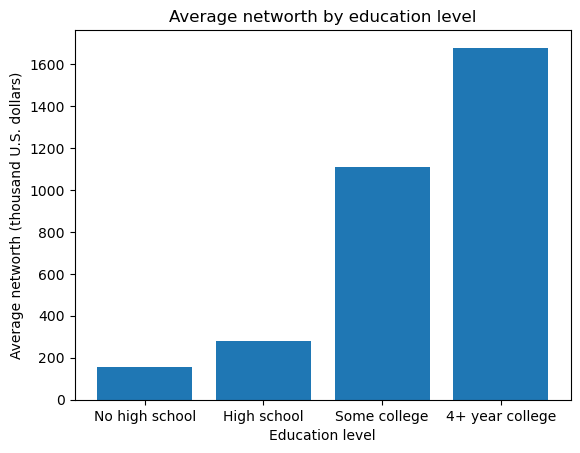

In [108]:
import matplotlib.pyplot as plt

education_level = ['No high school', 'High school', 'Some college', '4+ year college']
avg_networth = [avg1, avg2, avg3, avg4]

plt.bar(education_level, avg_networth)
plt.title('Average networth by education level')
plt.xlabel('Education level')
plt.ylabel('Average networth (thousand U.S. dollars)')


## Part 3

#### __3.1__

In [119]:
avg_nw_year = []
year = []

for i in range(1989, 2023, 3):
    selectyear = df1.query(f'year == {i}')
    avg_nw = selectyear['networth'].sum() / len(selectyear)
    year.append(i)
    avg_nw_year.append(avg_nw)

#### __3.2__

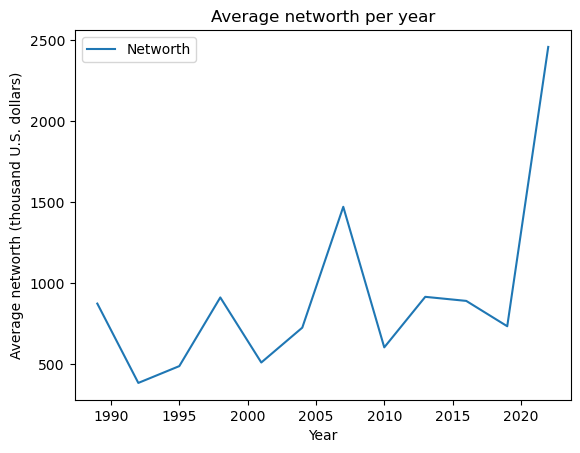

In [124]:
plt.plot(year, avg_nw_year, label = 'Networth')
plt.xlabel('Year')
plt.ylabel('Average networth (thousand U.S. dollars)')
plt.title('Average networth per year')
plt.legend()

## Part 4

#### __4.1__

***
# Data description

## Variables

| Variable         | Description |
|------------------|-------------|
| id               | Identifier  |
| year             | Survey year |
| age             | Age of reference person (household head) |
| educ            | Education of reference person (1 = no high school/GED, 2 = high school or GED, 3 = some college or Assoc. degree, 4 = Bachelors degree or higher)|
| networth        | Net worth in US dollars |

## Reference

- URL: https://www.federalreserve.gov/econres/scfindex.htm
- DOI Identifier: https://doi.org/10.17016/8799
- Creator: Board of Governors of the Federal Reserve Board
- Name: 2022 Survey of Consumer Finances
- Description:
    The Survey of Consumer Finances (SCF) is normally a triennial cross-sectional survey of U.S. families. The survey data include information on families' balance sheets, pensions, income, and demographic characteristics.
- Publisher: Board of Governors of the Federal Reserve System
- Publication Year: 2023 